In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
###Preprocessing

In [3]:
lo1 = pd.read_csv('Location1.csv')
lo2 = pd.read_csv('Location2.csv')
lo3 = pd.read_csv('Location3.csv')
lo4 = pd.read_csv('Location4.csv')

In [4]:
lo2.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [5]:
lo1['Location'] = 'Location1'
lo2['Location'] = 'Location2'
lo3['Location'] = 'Location3'
lo4['Location'] = 'Location4'
df = pd.concat([lo1, lo2, lo3, lo4], ignore_index=True)
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [6]:
df.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.to_csv('final_dataset.csv', index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [10]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [11]:
df.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [12]:
df.drop('Time', axis=1, inplace=True)
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [13]:
###EDA

In [14]:
df = df.astype({col: int for col in df.select_dtypes(bool).columns})
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [16]:
numerical_columns=df.select_dtypes(include=["number"]).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2', 'Location_Location3',
       'Location_Location4'],
      dtype='object')

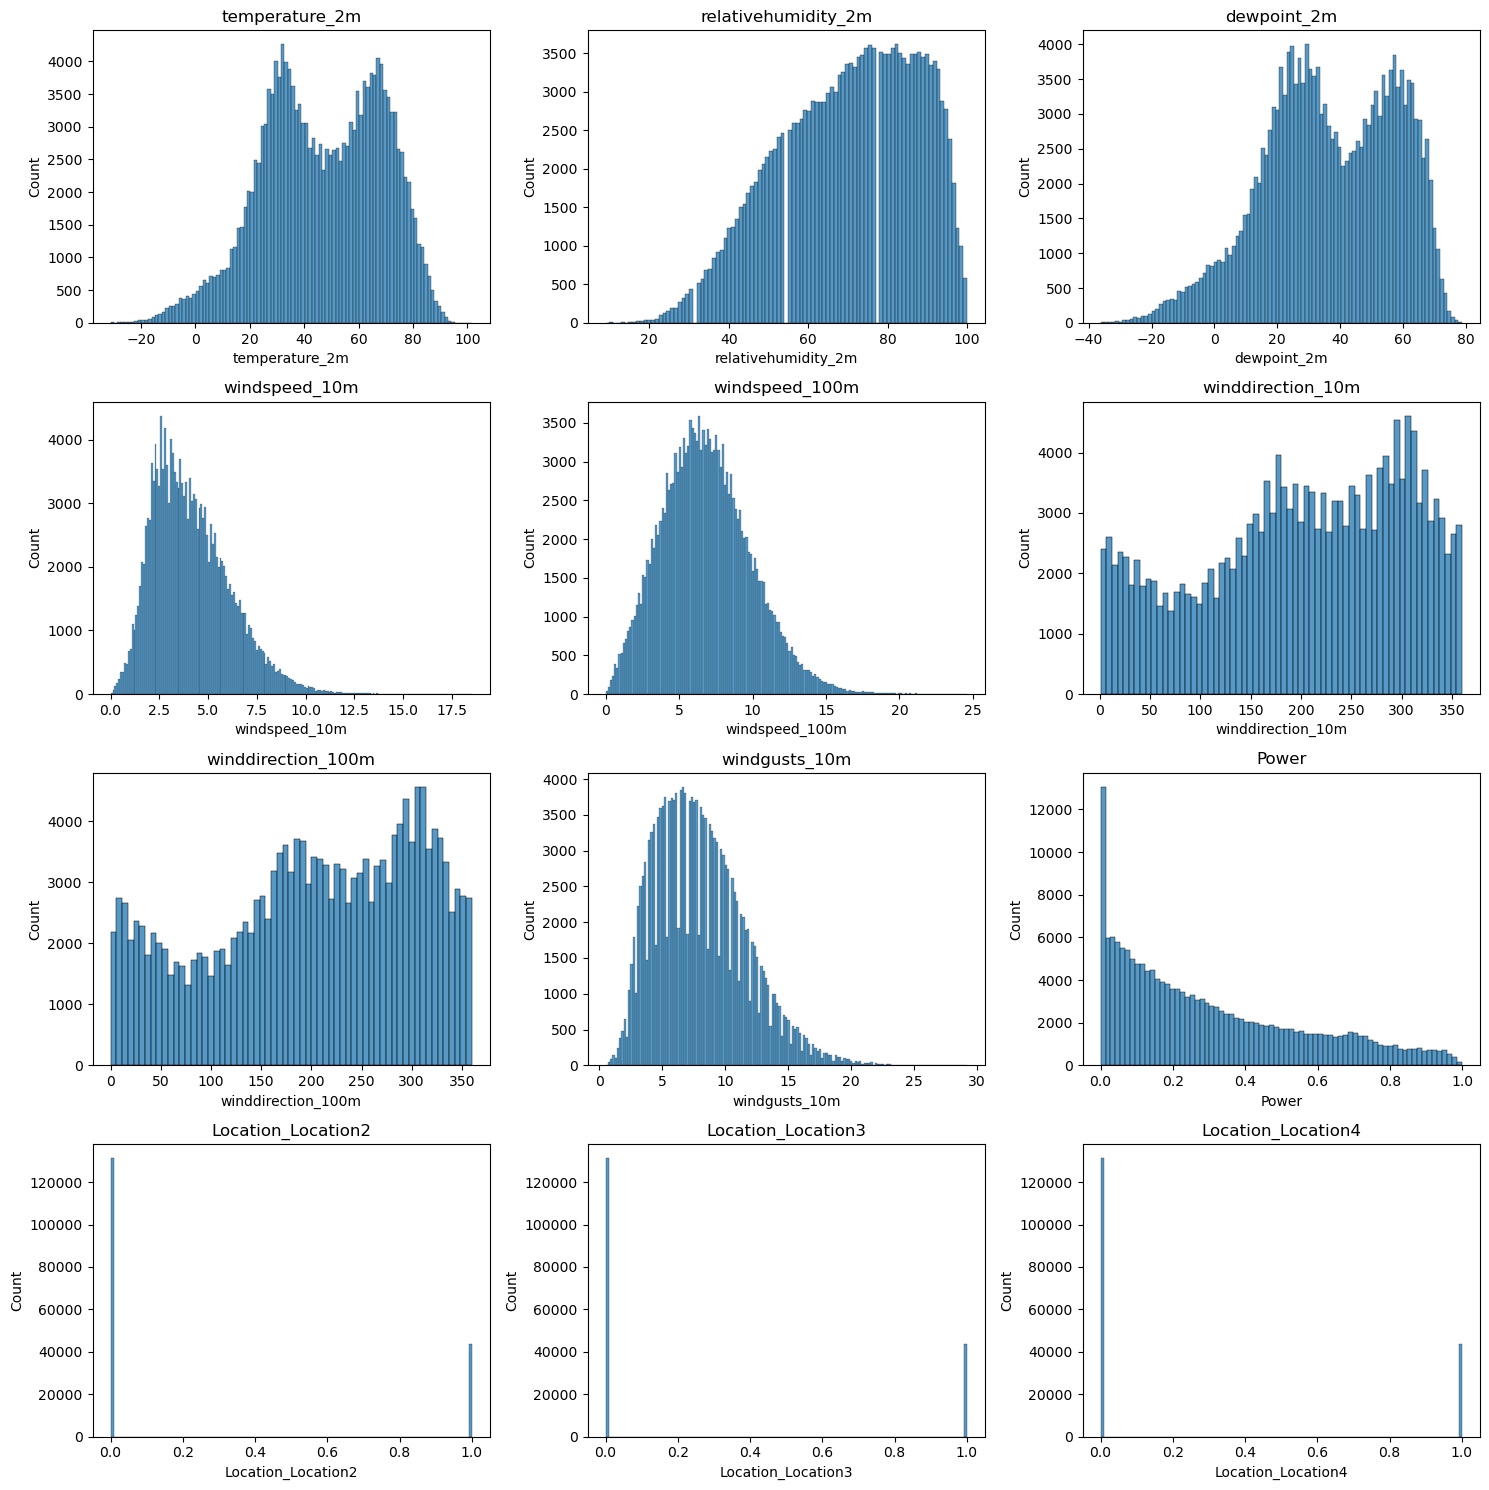

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

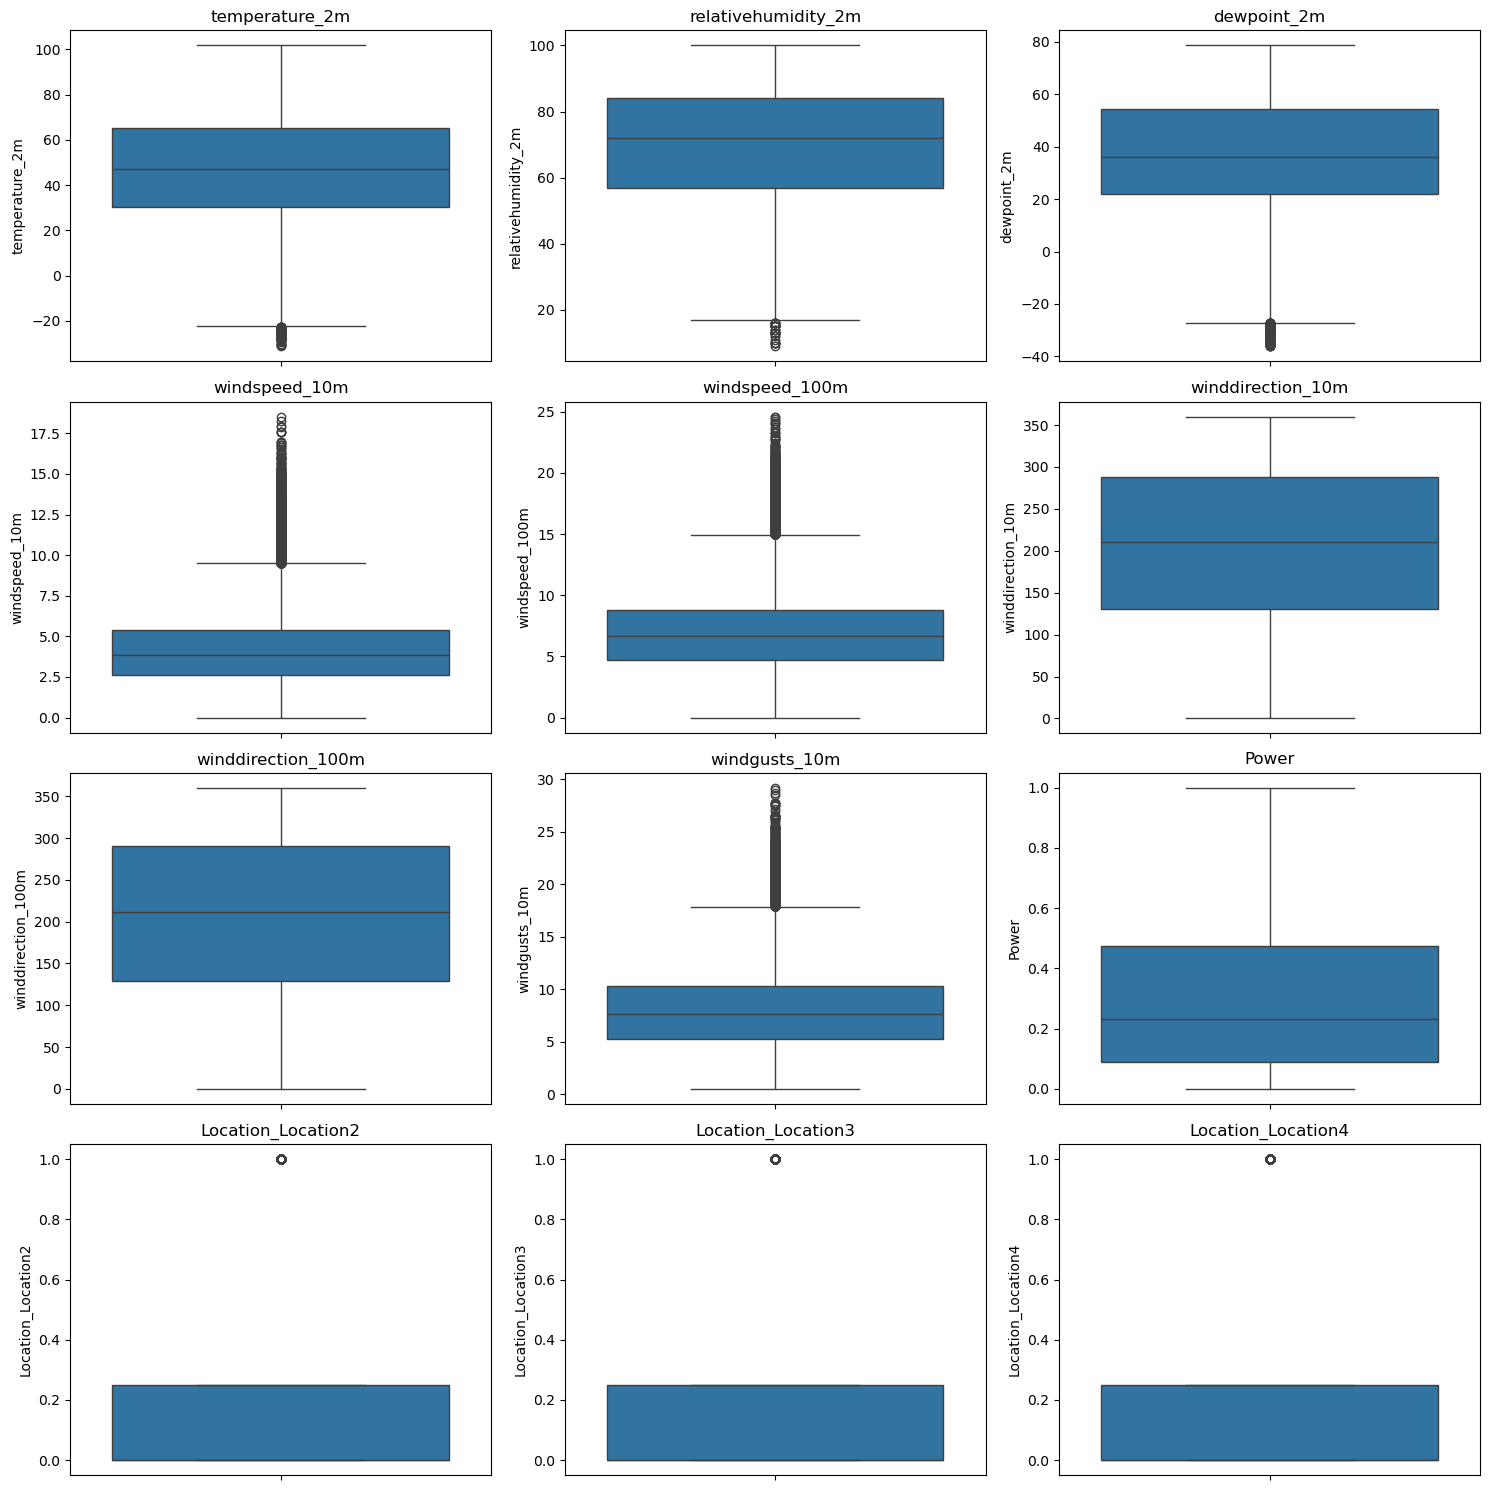

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

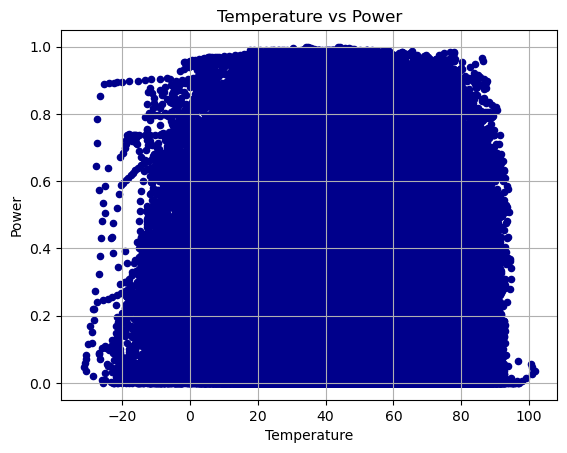

In [20]:
df.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

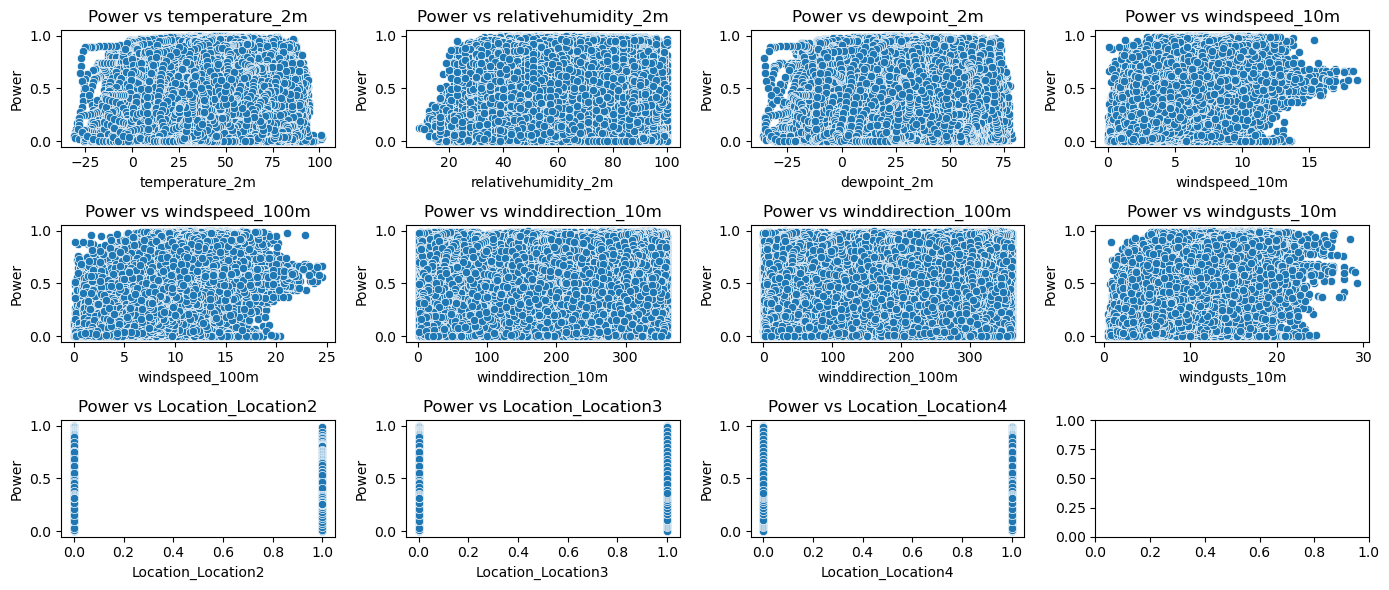

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=df, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

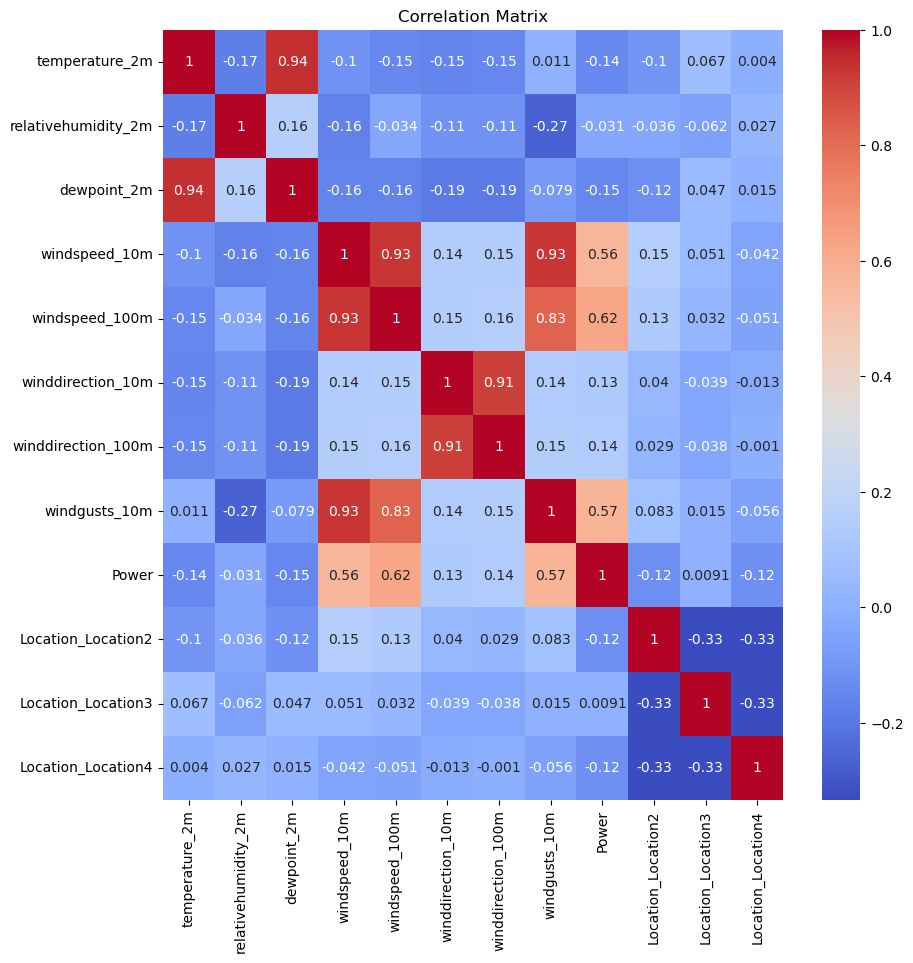

In [26]:
correlation = df[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
###Model training

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
X = df.drop('Power', axis=1) # features
y = df['Power'] # target
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train with Linear Regression Model

# initialize the model
model1 = LinearRegression()
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred1 = model1.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.13770257172514175
Mean Squared Error: 0.03248994443591342
R Squared Score: 0.5122261500969816


In [41]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor()
model2.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
y_pred2 = model2.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred2)
mse_rf = mean_squared_error(y_test, y_pred2)
r2_rf = r2_score(y_test, y_pred2)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10320378652968036
RF MSE: 0.022078732355000002
RF R2 Score: 0.6685304186032255


In [45]:
from sklearn.ensemble import AdaBoostRegressor
model3 = AdaBoostRegressor(n_estimators=100)
model3.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [47]:
y_pred_3 = model3.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_3)
mse_rf = mean_squared_error(y_test, y_pred_3)
r2_rf = r2_score(y_test, y_pred_3)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.14850106599226526
RF MSE: 0.034533258049866754
RF R2 Score: 0.48154973727629447


In [49]:
import lightgbm as lgb
model4 = lgb.LGBMRegressor()
model4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 157680, number of used features: 11
[LightGBM] [Info] Start training from score 0.303189


LGBMRegressor()

In [51]:
y_pred_4 = model4.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_4)
mse_rf = mean_squared_error(y_test, y_pred_4)
r2_rf = r2_score(y_test, y_pred_4)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.11791753133767617
RF MSE: 0.025456312089531273
RF R2 Score: 0.6178225734815933


In [53]:
# Hyperparameter tuning
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MAE: 0.11339136975717788
Tuned Model Mean Absolute Error (MAE): 0.11316843974248476
Tuned Model Mean Squared Error (MSE): 0.023851872165811076
Tuned Model R^2 Score: 0.641910144332162
